# Pacotes

In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Dense

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tensorflow.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tensorflow.keras.initializers.GlorotUniform(seed=seed)

2025-04-05 01:17:57.661127: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 01:17:57.665517: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 01:17:57.695194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743815877.740010    9149 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743815877.759387    9149 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-05 01:17:57.786885: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Carrega Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


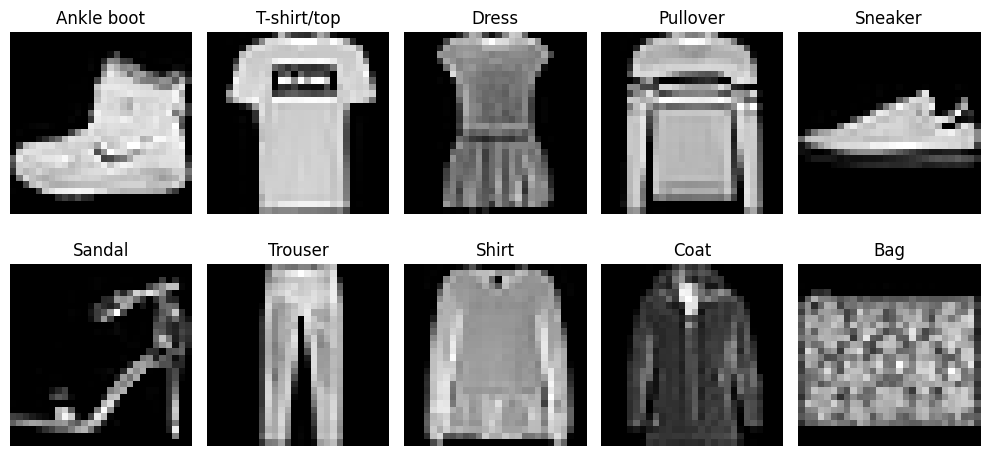

In [2]:
# Carregar o dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Definir os nomes das classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Criar um dicionário para armazenar exemplos de cada classe
samples = {}

# Procurar uma amostra de cada classe
for i in range(len(y_train)):
    label = y_train[i]
    if label not in samples:
        samples[label] = x_train[i]  # Salvar a primeira ocorrência da classe
    if len(samples) == 10:  # Se já temos todas as 10 classes, podemos parar
        break

# Mostrar as imagens
plt.figure(figsize=(10, 5))
for i, (label, image) in enumerate(samples.items()):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
# Carregar o dataset Fashion MNIST
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalizar os valores de pixel para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Redimensionar as imagens para um vetor unidimensional (28x28 = 784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Autoenconder

In [4]:
# Tamanho da codificação (ou seja, número de neurônios na camada oculta)
encoding_dim = 32

# Entrada
input_img = Input(shape=(784,))
# Camada oculta codificadora
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Camada de saída decodificadora
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo de autoencoder
autoencoder = Model(input_img, decoded)

2025-04-05 01:22:35.143850: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Compila Modelo

In [5]:
# Compilação do autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Treinamento do autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Reconstrução das imagens de teste usando o autoencoder treinado
decoded_imgs = autoencoder.predict(x_test)

2025-04-05 01:22:49.100126: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-04-05 01:22:49.336685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4995

2025-04-05 01:22:51.178405: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2025-04-05 01:22:51.187804: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4977 - val_loss: 0.3416
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3312 - val_loss: 0.3178
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3125 - val_loss: 0.3072
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3027 - val_loss: 0.3001
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2963 - val_loss: 0.2956
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2924 - val_loss: 0.2929
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2899 - val_loss: 0.2912
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2883 - val_loss: 0.2900
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2872 - val_loss: 0.2891
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2864 - val_loss: 0.2884
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2857 - val_loss: 0.2879
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

2025-04-05 01:23:48.384582: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step


# Visualiza Resultado

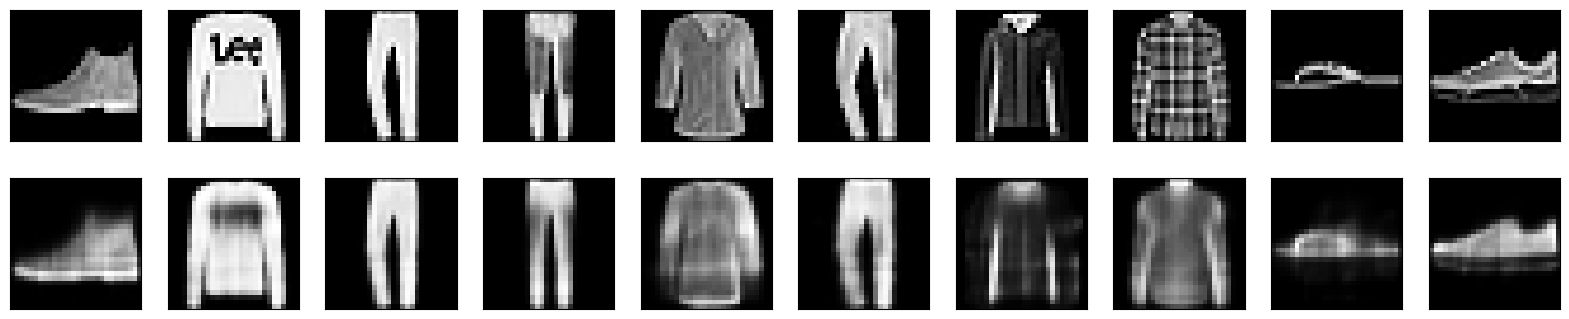

In [6]:
# Visualização das imagens originais e reconstruídas
n = 10  # Número de imagens para visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 📌 SSIM (Structural Similarity Index) – Teoria e Aplicação

O Structural Similarity Index (SSIM) é uma métrica usada para medir a similaridade perceptual entre duas imagens. Diferente do MSE (Mean Squared Error), que apenas calcula a diferença ponto a ponto entre os pixels, o SSIM leva em conta características estruturais da imagem, como luminosidade, contraste e estrutura.

In [11]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 51.0 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
from skimage.metrics import structural_similarity as ssim

# Calcular SSIM para uma imagem de teste
ssim_value = ssim(x_test[0].reshape(28, 28), decoded_imgs[0].reshape(28, 28), data_range=1.0)

print(f'SSIM da reconstrução: {ssim_value:.4f}')


SSIM da reconstrução: 0.7892
